In [75]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import tensorflow_hub as hub

In [76]:
# Getting names of the classes we have
data_dir = pathlib.Path(r'C:\Users\Harshit\Downloads\165890546209560ec2379f8793842aa5b168a_\PGA Wkend DL Exam\Datasets\CNN\Shoe Classification\train')
class_names = [item.name for item in data_directory.glob('*')][:3]
print(class_names)

['Boots', 'Sandals', 'Slippers']


In [77]:
Slippers_dir = r'C:\Users\Harshit\Downloads\165890546209560ec2379f8793842aa5b168a_\PGA Wkend DL Exam\Datasets\CNN\Shoe Classification\train\Slippers' 
sandal_dir = r'C:\Users\Harshit\Downloads\165890546209560ec2379f8793842aa5b168a_\PGA Wkend DL Exam\Datasets\CNN\Shoe Classification\train\Sandals'
boots_dir = r'C:\Users\Harshit\Downloads\165890546209560ec2379f8793842aa5b168a_\PGA Wkend DL Exam\Datasets\CNN\Shoe Classification\train\Boots'
data_dir = r'C:\Users\Harshit\Downloads\165890546209560ec2379f8793842aa5b168a_\PGA Wkend DL Exam\Datasets\CNN\Shoe Classification\train'

In [78]:
Slippers_images = len(os.listdir(Slippers_dir))
sandal_images = len(os.listdir(sandal_dir))
boots_images = len(os.listdir(boots_dir))
print(f'Number of Boot images: {Slippers_images}')
print(f'Number of Sandal images: {sandal_images}')
print(f'Number of Shoe images: {boots_images}')

Number of Boot images: 146
Number of Sandal images: 306
Number of Shoe images: 326


In [79]:
# Defining data generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data_dir, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 623 images belonging to 3 classes.
Found 155 images belonging to 3 classes.


In [80]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [81]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize=(10, 10))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()
    plt.show()


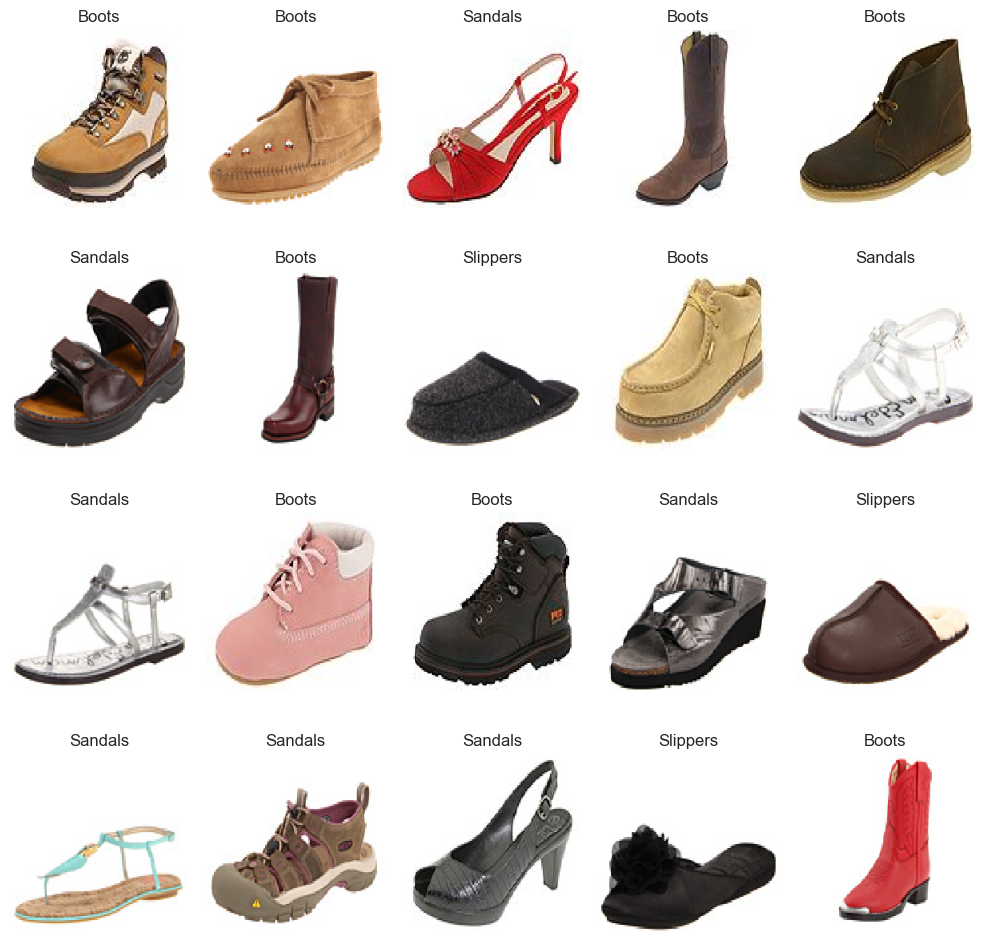

In [82]:
plot_random_images()

In [83]:
train_data, val_data

(<keras.preprocessing.image.DirectoryIterator at 0x18869fd2d10>,
 <keras.preprocessing.image.DirectoryIterator at 0x1886cabf100>)

In [84]:
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(3, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [87]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [88]:
classifier = model.fit(train_data, batch_size = 32, 
                                 epochs = 10, 
                                 validation_data = val_data, 
                                 verbose = 1,
                                 callbacks = [reduce_lr])

Epoch 1/10
20/20 [==============================] - 11s 548ms/step - loss: 5.4287 - accuracy: 0.6067 - val_loss: 0.7699 - val_accuracy: 0.6323 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - 11s 556ms/step - loss: 0.3708 - accuracy: 0.8587 - val_loss: 0.3388 - val_accuracy: 0.8903 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - 11s 557ms/step - loss: 0.2236 - accuracy: 0.9053 - val_loss: 0.4116 - val_accuracy: 0.8774 - lr: 0.0010
Epoch 4/10
20/20 [==============================] - 11s 548ms/step - loss: 0.0947 - accuracy: 0.9631 - val_loss: 0.3214 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 5/10
20/20 [==============================] - 11s 539ms/step - loss: 0.0410 - accuracy: 0.9856 - val_loss: 0.2953 - val_accuracy: 0.9097 - lr: 0.0010
Epoch 6/10
20/20 [==============================] - 11s 553ms/step - loss: 0.0275 - accuracy: 0.9952 - val_loss: 0.3764 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 7/10
20/20 [==============================] - 11s 546ms/st

In [89]:
model.evaluate(val_data)

5/5 [==============================] - 1s 100ms/step - loss: 0.6503 - accuracy: 0.9355


[0.6502938270568848, 0.9354838728904724]

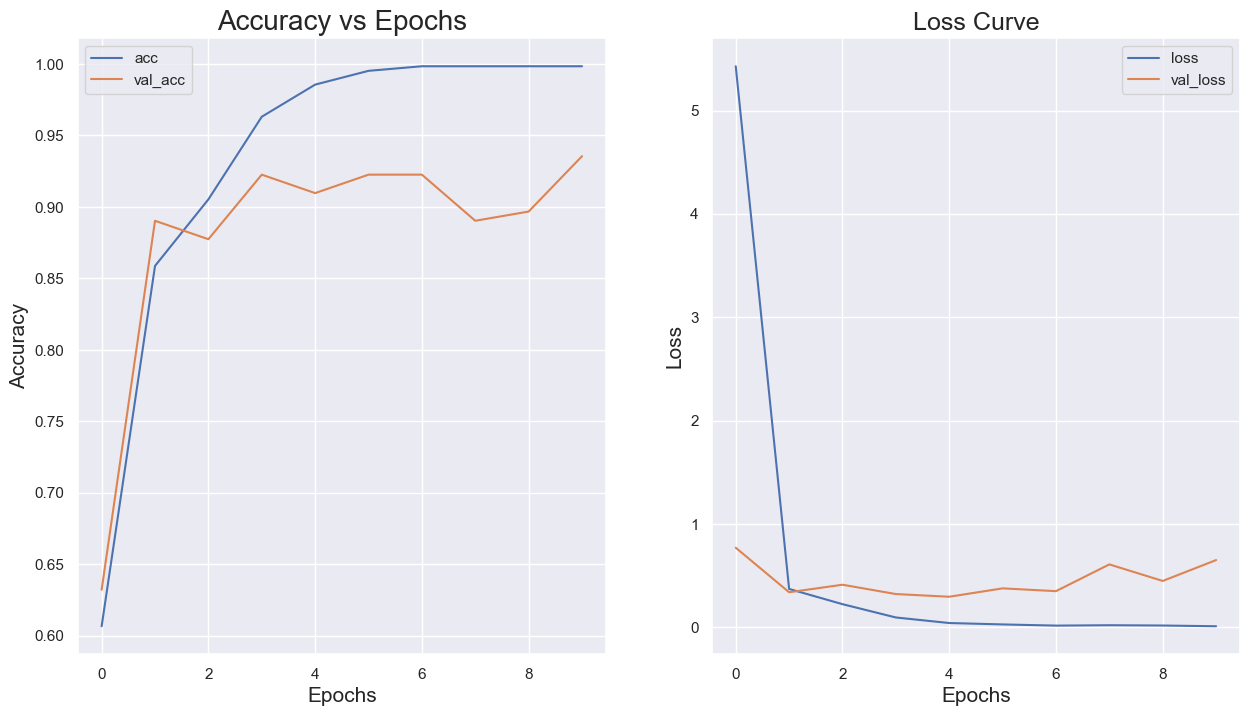

In [90]:
def model_performance_graphs():
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs()

In [91]:
model.save('model.h5')

In [94]:
loaded_model = tf.keras.models.load_model(r"C:\Users\Harshit\model.h5")

In [95]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed

In [102]:
img_path = r"C:\Users\Harshit\Downloads\165890546209560ec2379f8793842aa5b168a_\PGA Wkend DL Exam\Datasets\CNN\Shoe Classification\test\image (34).jpg"
img = preprocess_images(img_path)
prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)

class_labels = ['Boot', 'Sandal', 'Shoe']  
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 23ms/step
Predicted class: Boot
